In [71]:
import pandas as pd
import numpy as np
import math
import copy
import matplotlib.pyplot as plt

#Part A 1 Generate polynomial and interaction features for a given degree of the polynomial
def polynomialFeatures(X, degree):
    pa = []
    count = 0
    point = 0
    for i in range(1, degree+1):
        count = 0
        for j in range(count, len(X)):
            count = count + 1
    
    return X
    
X = [1, 3, 4]
degree = 5

polynomialFeatures(X,degree)


[1, 3, 4]

In [72]:
# Part A 2 Mean Squared Error
def mse(Y_true, Y_pred):
    mse = 0
    for i in range(0, len(Y_true)):
        mse = mse + pow((Y_true[i] - Y_pred[i]),2)
    mse = mse/len(Y_true)
    return mse
    
Y_true = [20, 30, 34, 53, 43]
Y_pred = [23, 28, 41, 59, 39]

mse(Y_true, Y_pred)

22.8

In [73]:
# Part A 3 Compute training and validation errors
# seperates array/matrix into k folds
def sHelper(x, k):
    cv_data = []
    mlt_fac = math.ceil(len(x)/k)
    cv_data = []
    cv_tmp = []
    counter = 0
    start = False
    for i in range(0, k):
        cv_tmp = []
        for j in range(0, len(x)):
            if( j == mlt_fac*i):
                start = True
            if(start==True):
                if(type(x[j])==int):
                    cv_tmp = cv_tmp + [x[j]]
                else:
                    cv_tmp = cv_tmp + x[j]
                count = counter + 1
            if(counter == mlt_fac):
                count = 0
                start = False
    return x


# Object used to hold data for learning curve
class Dummy:
    def __init__(self):
        self.X = np.array([])
        self.Y = np.array([])
        self.w = np.array([])

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        if( len(X) == len(X[0])):
            self.w = np.matmul(np.linalg.inv(self.X),np.transpose(self.Y))
        else:
            self.w = np.matmul(np.linalg.inv(np.matmul(np.transpose(self.X), self.X)),  np.matmul(np.transpose(self.X),self.Y))
    def predict(self, X):
        y_hat = np.matmul(X, self.w)
        return y_hat

# Computes Training Scores & Validation Scores
def learning_curve(model, X, Y, cv, train_size=1, learning_rate=0.01, epoches=1000, tol=None, regularization=None, lambd=0.0, **kwargs):

    train_scores = []
    avg_cv = []

    for i in range(1, train_size+1):
        x = X[0:train_size*i][:]
        y = Y[0:train_size*i]

        # create model for data
        model.fit(x,y)
        train_scores = train_scores + [math.sqrt(mse(y,model.predict(x)))]

        x = x.tolist()
        y = y.tolist()
        x = sHelper(x,cv)
        y = sHelper(y,cv)
        
        avg_cv_tmp = []
        for j in range(0, cv):
            cv_x = copy.copy(x)
            cv_y = copy.copy(y)
            cv_x_test = cv_x.pop(j)
            cv_y_test = [cv_y.pop(j)]

            model.fit(cv_x, cv_y)
            cv_y_hat = [model.predict(cv_x_test)]

            avg_cv_tmp = avg_cv_tmp + [math.sqrt(mse(cv_y_test,cv_y_hat))]
        
        avg_cv = avg_cv + [np.mean(avg_cv_tmp)]


    return train_scores, avg_cv


   
# training data
X = np.array([[2,3,5,2,4],[2,4,5,2,5],[3,2,3,5,8],[3,2,4,5,2],[2,5,5,1,8],[2,3,2,3,5],[3,4,2,5,6],[2,3,4,5,6],[2,3,4,4,5],[3,5,4,8,9],[9,9,8,4,5],[8,4,2,8,7],
              [3,9,5,4,5],[3,2,4,6,5],[2,3,4,2,5],[9,3,4,3,4],[9,3,2,3,4],[2,3,4,2,4],[2,3,5,2,5],[2,4,5,3,9],[2,3,4,2,5],[2,5,4,5,9],[2,3,9,8,4],[3,5,6,8,4],
              [2,5,8,9,5]])
# training labels
Y = np.array([3,6,3,5,7,4,5,3,4,5,2,3,8,4,5,3,4,5,3,4,3,5,6,5,6]) 

model = Dummy()

train_scores, val_scores = learning_curve(model, X, Y, 5, train_size = 5)

print("Training Scores: ", train_scores)
print("Validation Scores: ", val_scores)

Training Scores:  [1.8630587706705477e-15, 0.6566468105638373, 1.3900533388507215, 1.6061332211223076, 1.4577669900813204]
Validation Scores:  [4.550390625, 1.7042103533962725, 2.152668214896568, 2.0939137189702666, 1.764287349091105]


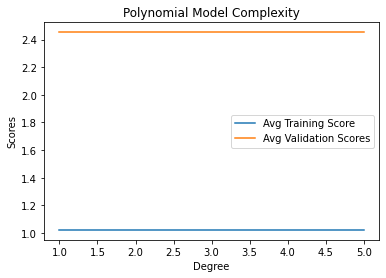

In [84]:
# Part A 4 Compute training and validation errors for various polynomial degrees



def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epoches=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    train_scores = []
    val_scores = []
    x_axis = []

    for i in range(1, maxPolynomialDegree+1):
        poly_x = []
        poly_y = []
        for j in range(0, len(X)):
            poly_x = poly_x + [polynomialFeatures(X[j],i)]
        poly_y = polynomialFeatures(Y,i)
        tmp_train_scores, tmp_val_scores = learning_curve(model, np.array(poly_x), np.array(poly_y), cv, train_size = 5)
        train_score = np.mean(tmp_train_scores)
        val_score = np.mean(tmp_val_scores)
        train_scores = train_scores + [train_score]
        val_scores = val_scores + [val_score]
        x_axis.append(i)

    #plot data
    plt.xlabel('Degree')
    plt.ylabel('Scores')
    plt.plot(x_axis, train_scores, label="Avg Training Score")
    plt.plot(x_axis, val_scores, label="Avg Validation Scores")
    plt.title("Polynomial Model Complexity")
    plt.legend()
    plt.show()
    
    

model = Dummy()
    
plot_polynomial_model_complexity(model, X, Y, 5, 5)

In [86]:
# part A 5 Linear Regression Model 
class Linear_Regression:
    def __init__(self):
        self.X = X
        self.Y = Y
